### Prepared by Hamed Janani

## Table of contents
* [Introduction and Business Problem](#introduction)
* [Data Description](#data)
* [Methodology and Analysis](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusions)

## 1. Introduction and Business Problem <a id="introduction"></a>


Vancouver is the third largest city in Canada with a rapidly growing population. This city is located in the province of British Columbia on the west coast of the country. The city hosts the largest port in Canada, and it is the largest industrial location. Other economic activities here include lumber and tourism, among other things.

Our stakeholder is willing to open a new restaurant in the city of Vancouver. 
City has a huge variety of restaurants for every taste and, thus, to start a restaurant business in this area is not an easy task. Choosing a location for business is one of the stressful and controversial tasks, since there are a lot of criteria that has to be satisfied in order to achieve the highest revenue. Any new business venture in the city needs to be reviewed carefully and strategically so that the return on investment will be sustainably reasonable with less risk of investment. To get close to our business target, In the proposed location must be enough customers, and in order to have enough customers, population and population density in that neighborhood should be relatively high and there shouldn’t be high number of restaurant per a 1000 people in the neighborhood and preferably there should be less restaurant in an immediate proximity of the location. 

In this project, we will implement the basic analysis and try to find the most optimal neighborhood to open the restaurant according to mentioned criteria. It's obvious, that there are many additional factors, such as distance from parking places or distance from the main streets, price of rent for location. These analyses can be done separately and after choosing the neighborhood, and thus will not be done within the scope of this project.


## 2. Data Description <a id="data"></a>

We need to explore, segment and cluster the neighborhoods in the city of Vancouver. The neighborhoods data is the key for this project. Unfortunately, the data for the city of Vancouver is not widely available on the internet in the structured format, hence we need to scrap it through an existing Wikipedia page that exists and has all information about population and population density of the neighborhood in the city of Vancouver. We use these data to explore and cluster the neighborhoods in Vancouver. We use geopy.geocoders package to get the geographical coordinate of neighborhood and add it to our dataframe. Then further information about venues could be obtained by these geographical information using Foursquare API.

At the end of this part, we have a cleaned and structured dataframe including different parameters about each neighborhood in the city of Vancouver. These informations are namely:

1- Neighborhood Name
2- Neighborhood Latitude
3- Neighborhood Longitude
4- Population of Residents in each Neighborhood
5- Population Density of Each Neighborhood(Population/Neighborhood Area(km^2))

References: (https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Vancouver)


First, let's import all the libraries that we will need

In [204]:
# Importing Libraries that are usefull for this project
import random 
import numpy as np 
import pandas as pd 
import requests
import bs4 as bs
import urllib.request
import matplotlib.pyplot as plt  
import csv
import folium 
from pandas.io.json import json_normalize 
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# Import k-means from clustering stage
from sklearn.cluster import KMeans
# from sklearn.cluster import KMeans 
%matplotlib inline
print('Required Libraries are Imported.')


Required Libraries are Imported.


### Data Preparation

In [205]:
from collections import defaultdict
Venacouver_population_info = defaultdict(list)
Venacouver_population_info['Neighborhood'] = ['Arbutus-Ridge','Yaletown','Dunbar-Southlands','Fairview','Grandview-Woodland','Hastings-Sunrise',
'Kensington-Cedar Cottage','Kerrisdale','Killarney','Kitsilano','Marpole','Mount Pleasant','Oakridge','Renfrew-Collingwood','Riley Park','Shaughnessy'
,'South Cambie','Strathcona','Sunset','Victoria-Fraserview','West-End','Point Grey']
Venacouver_population_info['Population'] = [15295, 62030, 21425, 33620, 29175, 33045, 49165, 13975, 22325, 43045, 24460, 53986, 13030, 51530, 21794, 8430,  6995, 12585, 36500, 31065, 47200, 13065] 
Venacouver_population_info['Population Density'] = [4134, 16764, 2503, 10281, 6556, 4069, 6791, 2215, 4416, 7884,  4376, 5600, 3249, 6401, 4843,  1890, 3224, 3244, 5831,  5850,23838,2935]

df1 = pd.DataFrame (Venacouver_population_info, columns = ['Neighborhood','Population','Population Density'])
# df.set_index('Neighborhood', inplace = True)
df1.head()

,Neighborhood,Population,Population Density
0,Arbutus-Ridge,15295,4134
1,Yaletown,62030,16764
2,Dunbar-Southlands,21425,2503
3,Fairview,33620,10281
4,Grandview-Woodland,29175,6556


#### Adding the latitude and longitude values of all Neighborhoods in Vancouver to the dataframe using geopy 


In [206]:
latitudes = [] # Initializing the latitude array
longitudes = [] # Initializing the longitude array    
from geopy.geocoders import Nominatim
import folium
# for nbd in df1["Neighborhood"]: 
# Use geopy library to get the latitude and longitude values of Vancouver BC
for nbd in df1["Neighborhood"]: 
    address = nbd + ' Vancouver British Columbia, TO' # Formats the place name
    geolocator = Nominatim()
    location = None
    while(not location):
        try:
            location = geolocator.geocode(address)
        except:
            pass
    latitude1 = location.latitude
    longitude1 = location.longitude
    latitudes.append(latitude1)
    longitudes.append(longitude1)

C:\Users\hjanani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  if __name__ == '__main__':


In [207]:
df1['Latitude'] = latitudes
df1['Longitude'] = longitudes
df1.head()

,Neighborhood,Population,Population Density,Latitude,Longitude
0,Arbutus-Ridge,15295,4134,49.240968,-123.167001
1,Yaletown,62030,16764,49.276322,-123.120956
2,Dunbar-Southlands,21425,2503,49.253460,-123.185044
3,Fairview,33620,10281,49.264113,-123.126835
4,Grandview-Woodland,29175,6556,49.270559,-123.067942


##### Judging the performance of the API using the number of collisions

In [208]:
col = 0
# df1[['Neigborhood'] == 'Oakridge',['Latitude'],['Longitude']] = [[49.226100], [-123.116600]]
df1.loc[df1['Neighborhood']=='Oakridge', ["Latitude", "Longitude"]] = 49.226100, -123.1166
explored_lat_lng = set()
for lat, lng in zip(df1['Latitude'], df1['Longitude']):
    if (lat, lng) in explored_lat_lng:
        col += 1
    else:
        explored_lat_lng.add((lat, lng))

print("Collisions : ", col)

Collisions :  0


Loading the dataframe into a csv file 

In [209]:
df1.to_csv(r'C:\Users\hjanani\Desktop\projects\dataVancouver.csv', index = False)

Reading the csv file

In [244]:
data_Vancouver = pd.read_csv('dataVancouver.csv')
print(data_Vancouver.shape)
data_Vancouver

(22, 5)


,Neighborhood,Population,Population Density,Latitude,Longitude
0,Arbutus-Ridge,15295,4134,49.240968,-123.167001
1,Yaletown,62030,16764,49.276322,-123.120956
2,Dunbar-Southlands,21425,2503,49.253460,-123.185044
3,Fairview,33620,10281,49.264113,-123.126835
4,Grandview-Woodland,29175,6556,49.270559,-123.067942
5,Hastings-Sunrise,33045,4069,49.277594,-123.043920
6,Kensington-Cedar Cottage,49165,6791,49.247632,-123.084207
7,Kerrisdale,13975,2215,49.234673,-123.155389
8,Killarney,22325,4416,49.224274,-123.046250
9,Kitsilano,43045,7884,49.269410,-123.155267


#### Use geopy library to get the latitude and longitude values of Vancouver BC

In [245]:
# This part is to get latitude and longtitude values of Vancouver.

from geopy.geocoders import Nominatim
import folium
# Use geopy library to get the latitude and longitude values of Vancouver BC.
address = 'Vancouver British Columbia, TO'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_v = location.latitude
longitude_v = location.longitude
print('The geograpical coordinate of Vancouver BC are {}, {}.'.format(latitude_v, longitude_v))

C:\Users\hjanani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  import sys


The geograpical coordinate of Vancouver BC are 49.2608724, -123.1139529.


#### Using Foursquare API to get information about venues around each neighborhood in Vancouver

In [246]:
# Defining Foursquare Credentials and Version
CLIENT_ID = 'JSUTWEDIV5U2NOGPBV2PVUCNG4SD4W0DOQI00WXQKGGHB4HR' # your Foursquare ID
CLIENT_SECRET = 'XMRSJTCFVVTXGLQPHWAGKSGOCQ2MEOLVOUD1LHX232V2WRE1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JSUTWEDIV5U2NOGPBV2PVUCNG4SD4W0DOQI00WXQKGGHB4HR
CLIENT_SECRET:XMRSJTCFVVTXGLQPHWAGKSGOCQ2MEOLVOUD1LHX232V2WRE1


#### Create a function to explore the venues for all the neighborhoods in Vancouver

In [247]:
# Explore Neighborhoods in Vancouver
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Create a new dataframe called Vancouver_venues.

In [248]:
# geting Vancouver venues
LIMIT = 100
radius = 1000
Vancouver_venues = getNearbyVenues(names=data_Vancouver['Neighborhood'],
                                   latitudes=data_Vancouver['Latitude'],
                                   longitudes=data_Vancouver['Longitude']
                                  )

print(Vancouver_venues.shape)


Arbutus-Ridge
Yaletown
Dunbar-Southlands
Fairview
Grandview-Woodland
Hastings-Sunrise
Kensington-Cedar Cottage
Kerrisdale
Killarney
Kitsilano
Marpole
Mount Pleasant
Oakridge
Renfrew-Collingwood
Riley Park
Shaughnessy
South Cambie
Strathcona
Sunset
Victoria-Fraserview
West-End
Point Grey
(613, 7)


In [249]:
Vancouver_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arbutus-Ridge,49.240968,-123.167001,Butter Baked Goods,49.242209,-123.170381,Bakery
1,Arbutus-Ridge,49.240968,-123.167001,The Haven,49.241377,-123.166331,Spa
2,Arbutus-Ridge,49.240968,-123.167001,Barktholomews Pet Supplies,49.242746,-123.170193,Pet Store
3,Arbutus-Ridge,49.240968,-123.167001,The Dragon's Layer,49.238518,-123.169029,Nightlife Spot
4,Arbutus-Ridge,49.240968,-123.167001,The Heights Market,49.237902,-123.170949,Grocery Store


In [250]:
# check out how many venues were returned for each neighborhood
Vancouver_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arbutus-Ridge,5,5,5,5,5,5
Dunbar-Southlands,9,9,9,9,9,9
Fairview,26,26,26,26,26,26
Grandview-Woodland,70,70,70,70,70,70
Hastings-Sunrise,13,13,13,13,13,13
Kensington-Cedar Cottage,20,20,20,20,20,20
Kerrisdale,38,38,38,38,38,38
Killarney,4,4,4,4,4,4
Kitsilano,46,46,46,46,46,46


In [251]:
# find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(Vancouver_venues['Venue Category'].unique())))

There are 148 uniques categories.


In [252]:
Vancouver_venues['Venue Category'].value_counts()

Coffee Shop            41
Sushi Restaurant       26
Japanese Restaurant    21
Café                   17
Park                   16
                       ..
Soccer Field            1
Food                    1
Shopping Mall           1
Pet Store               1
Art Gallery             1
Name: Venue Category, Length: 148, dtype: int64

#### exploring the number of restaurants between the venues in each neighborhood and adding it to our dataframe

#### Data Cleaning by fillna

In [253]:
Vancouver_restaurant = Vancouver_venues[(Vancouver_venues['Venue Category'].str.contains('Beer', regex=False)) |
                 (Vancouver_venues['Venue Category'].str.contains('Beer Garden', regex=False)) |
                 (Vancouver_venues['Venue Category'].str.contains('Restaurant', regex=False)) |
                 (Vancouver_venues['Venue Category'].str.contains('Bar', regex=False)) |
                 (Vancouver_venues['Venue Category'].str.contains('Steakhouse', regex=False)) |
                 (Vancouver_venues['Venue Category'].str.contains('Taverna', regex=False))].groupby(['Neighborhood']).count()
Vancouver_restaurant.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
Vancouver_restaurant.rename(columns = {'Venue Category':'Number of restaurants'}, inplace=True)
# Vancouver_restaurant = Vancouver_restaurant.reset_index()
# join above dataframe to the main df
data_Vancouver = data_Vancouver.join(Vancouver_restaurant, on='Neighborhood')
# Vancouver_restaurant = Vancouver_restaurant.reset_index()
# data_Vancouver = pd.merge(data_Vancouver, Vancouver_restaurant, on='Neighborhood')#merge removes line with no data but join keeps them and fill them with NaN
# data_Vancouver.head()
data_Vancouver = data_Vancouver.fillna(0)
data_Vancouver[['Number of restaurants']] = data_Vancouver[['Number of restaurants']].astype('int64')
data_Vancouver.head()

,Neighborhood,Population,Population Density,Latitude,Longitude,Number of restaurants
0,Arbutus-Ridge,15295,4134,49.240968,-123.167001,0
1,Yaletown,62030,16764,49.276322,-123.120956,42
2,Dunbar-Southlands,21425,2503,49.253460,-123.185044,5
3,Fairview,33620,10281,49.264113,-123.126835,13
4,Grandview-Woodland,29175,6556,49.270559,-123.067942,28


In [254]:
data_Vancouver.head()

,Neighborhood,Population,Population Density,Latitude,Longitude,Number of restaurants
0,Arbutus-Ridge,15295,4134,49.240968,-123.167001,0
1,Yaletown,62030,16764,49.276322,-123.120956,42
2,Dunbar-Southlands,21425,2503,49.253460,-123.185044,5
3,Fairview,33620,10281,49.264113,-123.126835,13
4,Grandview-Woodland,29175,6556,49.270559,-123.067942,28


## 3. Methodology and Analysis <a id="methodology"></a>

After cleaning and preparing the data, let us identify the steps, that have to be performed in order to find the most optimal neighborhood and location to start up our new business. Firstly, we will apply some basic exploratory analysis to our data. We can visually inspect some values in our data with the help of bar charts. We have the possibility to reduce the number features in data frame by replacing them with more reasonable data. We can use Folium map, heat map and scatter plot with combination of different features of the neighborhood to have better visualization of data. Finally, we will perform cluster analysis and try to jointly combine the useful information of population, population density, number of restaurants and number of restaurants per 1000 people to find the best cluster of neighborhoods with meaningful features and at the end the best proposed geographical location.

### 3.1 Exploratory Data Analysis

Let's first derive some basic statistical values of our data.

In [255]:
data_Vancouver.describe()

,Population,Population Density,Latitude,Longitude,Number of restaurants
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,29260.909091,6222.454545,49.250517,-123.113730,10.863636
std,16225.463694,5096.961810,0.021926,0.042758,11.760691
min,6995.000000,1890.000000,49.209223,-123.195022,0.000000
25%,14305.000000,3245.250000,49.236247,-123.137554,1.000000
50%,26817.500000,4629.500000,49.249747,-123.118758,6.500000
75%,41408.750000,6517.250000,49.268086,-123.085650,17.500000
max,62030.000000,23838.000000,49.284131,-123.043920,42.000000


#### Analysis of population in the city of Vancouver

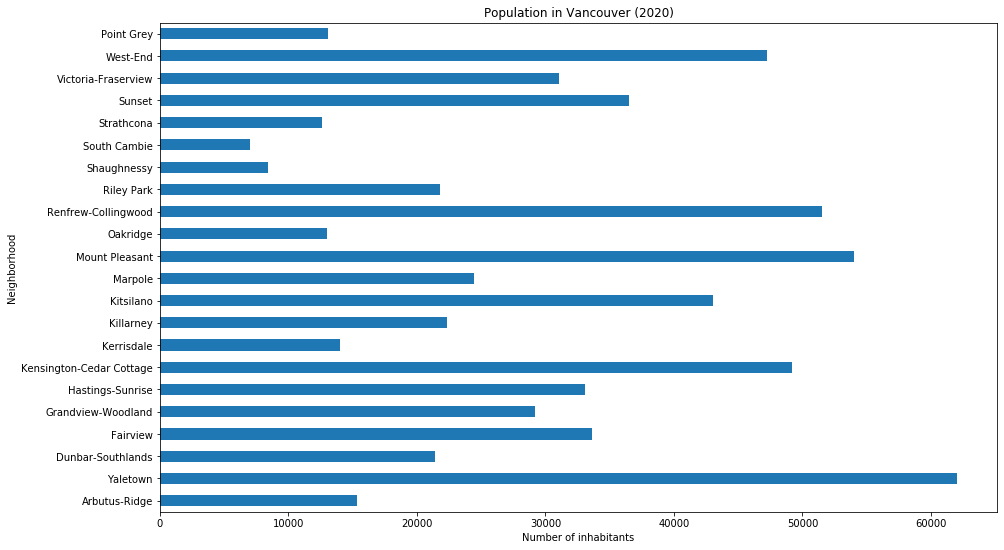

In [256]:
data_Vancouver[['Neighborhood', 'Population']].plot(kind='barh', figsize=(15, 9), legend = None)

plt.xlabel('Number of inhabitants') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Population in Vancouver (2020)') # add title to the plot
plt.yticks (np.arange(22), data_Vancouver['Neighborhood'])
plt.show()

#### Analysis of population density in the city of Vancouver

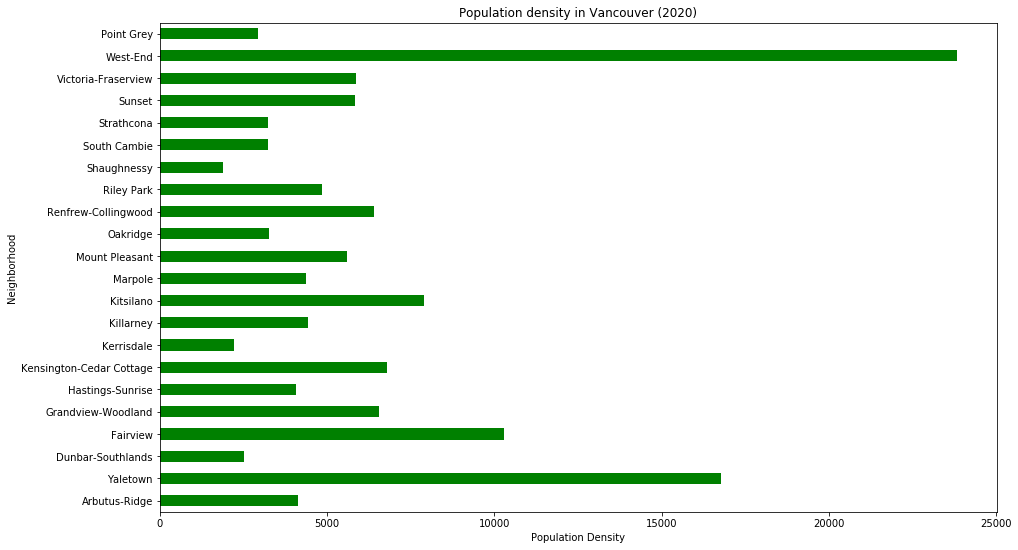

In [223]:
# step 2: plot data
data_Vancouver[['Neighborhood', 'Population Density']].plot(kind='barh', figsize=(15, 9), legend = None, color='green')

plt.xlabel('Population Density') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Population density in Vancouver (2020)') # add title to the plot
plt.yticks (np.arange(22), data_Vancouver['Neighborhood'])
plt.show()

#### Analysis of number of restaurants in the city of Vancouver

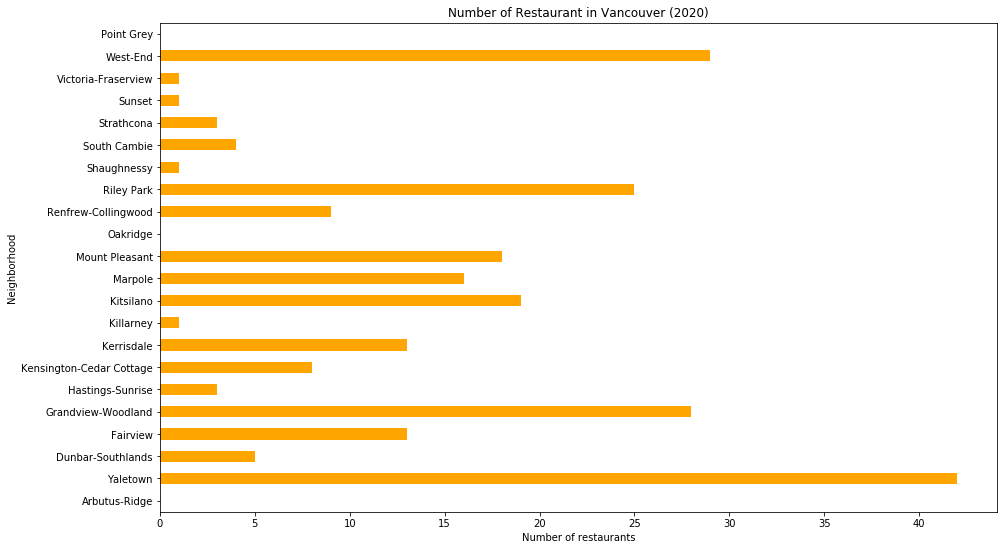

In [224]:
data_Vancouver[['Neighborhood', 'Number of restaurants']].plot(kind='barh', figsize=(15, 9), legend = None, color='orange')

plt.xlabel('Number of restaurants') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Number of Restaurant in Vancouver (2020)') # add title to the plot
plt.yticks (np.arange(22), data_Vancouver['Neighborhood'])
plt.show()

In [257]:
data_Vancouver['Number of restaurants per 1000 people'] = data_Vancouver['Number of restaurants']/(data_Vancouver['Population']/1000)
data_Vancouver.head()

,Neighborhood,Population,Population Density,Latitude,Longitude,Number of restaurants,Number of restaurants per 1000 people
0,Arbutus-Ridge,15295,4134,49.240968,-123.167001,0,0.000000
1,Yaletown,62030,16764,49.276322,-123.120956,42,0.677092
2,Dunbar-Southlands,21425,2503,49.253460,-123.185044,5,0.233372
3,Fairview,33620,10281,49.264113,-123.126835,13,0.386675
4,Grandview-Woodland,29175,6556,49.270559,-123.067942,28,0.959726


#### Analysis of number of restaurants per 1000 people in the city of Vancouver

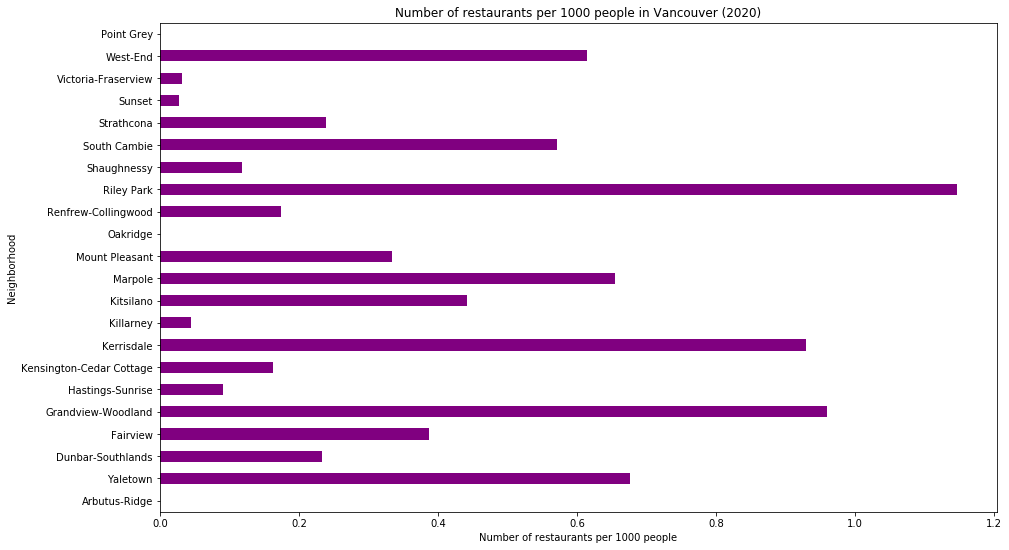

In [279]:
data_Vancouver[['Neighborhood', 'Number of restaurants per 1000 people']].plot(kind='barh', figsize=(15, 9), legend = None, color='purple')

plt.xlabel('Number of restaurants per 1000 people') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Number of restaurants per 1000 people in Vancouver (2020)') # add title to the plot
plt.yticks (np.arange(22), data_Vancouver['Neighborhood'])
plt.show()

### Using Folium to display the neighborhoods in the city of Vancouver
It is quite useful to visualize the center locations of each neighborhood.

In [259]:
Van_lat = latitude_v
Van_lng = longitude_v

# Creates map of Vancouver using latitude and longitude values
map_Vancouver = folium.Map(location=[Van_lat, Van_lng], zoom_start=11)

# Add markers to map
for lat, lng, neighborhood in zip(data_Vancouver['Latitude'], data_Vancouver['Longitude'], data_Vancouver['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Vancouver)  
    
map_Vancouver

#### Using Folium with heatmap to display the neighborhoods in the city of Vancouver

In [260]:
# create the heatmap of Vancouver BC using latitude and longitude values
map_Vancouver = folium.Map(location=[Van_lat, Van_lng], zoom_start=11)
from folium import plugins
# add markers to map
for lat, lng, neighborhood in zip(data_Vancouver['Latitude'], data_Vancouver['Longitude'], data_Vancouver['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Vancouver)  

hm_data = data_Vancouver[["Latitude", "Longitude"]].as_matrix().tolist()
map_Vancouver.add_child(plugins.HeatMap(hm_data))
    
map_Vancouver

C:\Users\hjanani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


### Cluster Analysis

In order to identify groups (clusters) with similar characteristics, let's us apply the Kmeans (unsupervised learning method) to our data. But before that, let's reconfigure the dataframe using one hot encoding and remove column "Neighborhood". 

In [261]:
# Analyze each neighborhood

# one hot encoding
Vancouver_onehot = pd.get_dummies(Vancouver_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Vancouver_onehot['Neighborhood'] = Vancouver_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Vancouver_onehot.columns[-1]] + list(Vancouver_onehot.columns[:-1])
Vancouver_onehot = Vancouver_onehot[fixed_columns]

Vancouver_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,...,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Arbutus-Ridge,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Arbutus-Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arbutus-Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arbutus-Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arbutus-Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Vancouver_onehot[Vancouver_onehot['Neighborhood'] =='Fairview']

In [262]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
Vancouver_grouped = Vancouver_onehot.groupby('Neighborhood').mean().reset_index()
Vancouver_grouped.head()

,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,...,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Arbutus-Ridge,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.200000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,Dunbar-Southlands,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
2,Fairview,0.0,0.0,0.0,0.076923,0.0,0.038462,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.038462,0.0,0.000000,0.0
3,Grandview-Woodland,0.0,0.0,0.0,0.000000,0.0,0.014286,0.0,0.028571,0.014286,...,0.0,0.0,0.014286,0.0,0.0,0.014286,0.000000,0.0,0.014286,0.0
4,Hastings-Sunrise,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.076923,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.153846,0.0,0.000000,0.0


In [234]:
# Let's confirm the new size
Vancouver_grouped.shape

(22, 149)

In [263]:
# Print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in Vancouver_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Vancouver_grouped[Vancouver_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arbutus-Ridge----
            venue  freq
0   Grocery Store   0.2
1             Spa   0.2
2       Pet Store   0.2
3          Bakery   0.2
4  Nightlife Spot   0.2


----Dunbar-Southlands----
                venue  freq
0    Sushi Restaurant  0.22
1   Indian Restaurant  0.11
2  Salon / Barbershop  0.11
3      Ice Cream Shop  0.11
4  Italian Restaurant  0.11


----Fairview----
               venue  freq
0        Coffee Shop  0.15
1   Asian Restaurant  0.08
2               Park  0.08
3           Pharmacy  0.08
4  Indian Restaurant  0.04


----Grandview-Woodland----
                 venue  freq
0          Coffee Shop  0.10
1   Italian Restaurant  0.06
2    Indian Restaurant  0.04
3  Japanese Restaurant  0.04
4                 Park  0.04


----Hastings-Sunrise----
                   venue  freq
0  Vietnamese Restaurant  0.15
1                    Inn  0.08
2           Liquor Store  0.08
3               Pharmacy  0.08
4            Event Space  0.08


----Kensington-Cedar Cottage----
      

In [264]:
# sorting the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [265]:
# create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Vancouver_grouped['Neighborhood']

for ind in np.arange(Vancouver_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Vancouver_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus-Ridge,Pet Store,Grocery Store,Bakery,Spa,Nightlife Spot,Yoga Studio,Ethiopian Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market
1,Dunbar-Southlands,Sushi Restaurant,Ice Cream Shop,Sporting Goods Shop,Indian Restaurant,Coffee Shop,Italian Restaurant,Liquor Store,Salon / Barbershop,Event Space,Fast Food Restaurant
2,Fairview,Coffee Shop,Park,Asian Restaurant,Pharmacy,Salon / Barbershop,Falafel Restaurant,Malay Restaurant,Restaurant,Camera Store,Korean Restaurant
3,Grandview-Woodland,Coffee Shop,Italian Restaurant,Café,Indian Restaurant,Park,Deli / Bodega,Japanese Restaurant,Pizza Place,Sushi Restaurant,French Restaurant
4,Hastings-Sunrise,Vietnamese Restaurant,Pharmacy,Bakery,Sandwich Place,Liquor Store,Food Truck,Sushi Restaurant,Event Space,Bus Line,Coffee Shop


### Let's find the optimum k for k-means
#### To identify the optimal number of clusters, the Elbow method is used:

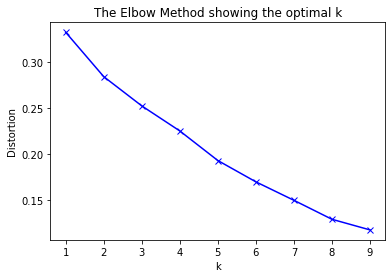

In [266]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(Vancouver_grouped_clustering)
#     kmeanModel.fit(Vancouver_grouped_clustering)
    distortions.append(sum(np.min(cdist(Vancouver_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Vancouver_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### Great! On the graph, we can see that 5 clusters are enough:

In [267]:
# Run k-means to cluster the neighborhood into 5 clusters.

kclusters = 5

Vancouver_grouped_clustering = Vancouver_grouped.drop('Neighborhood', 1)

# run k-means clustering
# Important: If data in different dimentions have different scale, DF should be normalized.
# ................................................
# from sklearn.preprocessing import StandardScaler
# Vancouver_grouped_clustering = StandardScaler().fit_transform(Vancouver_grouped_clustering)
# Vancouver_grouped_clustering
# ................................................
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Vancouver_grouped_clustering)
# check cluster labels generated for each row in the dataframe
# kmeans.labels_[0:10]
data_Vancouver.head()

,Neighborhood,Population,Population Density,Latitude,Longitude,Number of restaurants,Number of restaurants per 1000 people
0,Arbutus-Ridge,15295,4134,49.240968,-123.167001,0,0.000000
1,Yaletown,62030,16764,49.276322,-123.120956,42,0.677092
2,Dunbar-Southlands,21425,2503,49.253460,-123.185044,5,0.233372
3,Fairview,33620,10281,49.264113,-123.126835,13,0.386675
4,Grandview-Woodland,29175,6556,49.270559,-123.067942,28,0.959726


#### Let's insert the Cluster labels into our master dataframe.

In [268]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Vancouver_merged = data_Vancouver

# merge Vancouver_grouped with Vancouver_data to add latitude/longitude for each neighborhood
Vancouver_merged = Vancouver_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Vancouver_merged.head() # check the last columns!


,Neighborhood,Population,Population Density,Latitude,Longitude,Number of restaurants,Number of restaurants per 1000 people,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus-Ridge,15295,4134,49.240968,-123.167001,0,0.000000,0,Pet Store,Grocery Store,Bakery,Spa,Nightlife Spot,Yoga Studio,Ethiopian Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market
1,Yaletown,62030,16764,49.276322,-123.120956,42,0.677092,0,Italian Restaurant,Hotel,Sushi Restaurant,Restaurant,Café,Mexican Restaurant,Spa,Pizza Place,Park,Bakery
2,Dunbar-Southlands,21425,2503,49.253460,-123.185044,5,0.233372,0,Sushi Restaurant,Ice Cream Shop,Sporting Goods Shop,Indian Restaurant,Coffee Shop,Italian Restaurant,Liquor Store,Salon / Barbershop,Event Space,Fast Food Restaurant
3,Fairview,33620,10281,49.264113,-123.126835,13,0.386675,0,Coffee Shop,Park,Asian Restaurant,Pharmacy,Salon / Barbershop,Falafel Restaurant,Malay Restaurant,Restaurant,Camera Store,Korean Restaurant
4,Grandview-Woodland,29175,6556,49.270559,-123.067942,28,0.959726,0,Coffee Shop,Italian Restaurant,Café,Indian Restaurant,Park,Deli / Bodega,Japanese Restaurant,Pizza Place,Sushi Restaurant,French Restaurant


In [30]:
Vancouver_merged.head()

,Neighborhood,Population,Population Density,Latitude,Longitude,Number of restaurants,Number of restaurants per 1000 people,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus-Ridge,15295,4134,49.240968,-123.167001,0,0.000000,0,Pet Store,Grocery Store,Bakery,Spa,Nightlife Spot,Yoga Studio,Ethiopian Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market
1,Yaletown,62030,16764,49.276322,-123.120956,42,0.677092,0,Italian Restaurant,Hotel,Sushi Restaurant,Restaurant,Café,Mexican Restaurant,Spa,Pizza Place,Park,Bakery
2,Dunbar-Southlands,21425,2503,49.253460,-123.185044,5,0.233372,0,Sushi Restaurant,Ice Cream Shop,Sporting Goods Shop,Indian Restaurant,Coffee Shop,Italian Restaurant,Liquor Store,Salon / Barbershop,Event Space,Fast Food Restaurant
3,Fairview,33620,10281,49.264113,-123.126835,13,0.386675,0,Coffee Shop,Park,Asian Restaurant,Pharmacy,Salon / Barbershop,Falafel Restaurant,Malay Restaurant,Restaurant,Camera Store,Korean Restaurant
4,Grandview-Woodland,29175,6556,49.270559,-123.067942,28,0.959726,0,Coffee Shop,Italian Restaurant,Café,Indian Restaurant,Park,Deli / Bodega,Japanese Restaurant,Pizza Place,Sushi Restaurant,French Restaurant
5,Hastings-Sunrise,33045,4069,49.277594,-123.043920,3,0.090785,0,Vietnamese Restaurant,Pharmacy,Bakery,Sandwich Place,Liquor Store,Food Truck,Sushi Restaurant,Event Space,Bus Line,Coffee Shop
6,Kensington-Cedar Cottage,49165,6791,49.247632,-123.084207,8,0.162717,0,Bus Stop,Coffee Shop,Vietnamese Restaurant,Ice Cream Shop,Sandwich Place,Café,Chinese Restaurant,Convenience Store,Electronics Store,Filipino Restaurant
7,Kerrisdale,13975,2215,49.234673,-123.155389,13,0.930233,0,Coffee Shop,Chinese Restaurant,Pharmacy,Sandwich Place,Sushi Restaurant,Tea Room,Soccer Field,Burger Joint,Café,Portuguese Restaurant
8,Killarney,22325,4416,49.224274,-123.046250,1,0.044793,0,Pool,Italian Restaurant,Track,Gym,Donut Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
9,Kitsilano,43045,7884,49.269410,-123.155267,19,0.441399,0,Bakery,Ice Cream Shop,Thai Restaurant,Coffee Shop,Food Truck,French Restaurant,Japanese Restaurant,Sushi Restaurant,American Restaurant,Yoga Studio


#### Let's visualize the resulting clusters in different colors.

In [269]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location = [Van_lat, Van_lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Vancouver_merged['Latitude'], Vancouver_merged['Longitude'], Vancouver_merged['Neighborhood'], Vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Now, it's time to create maps representing our clusters while the radius of the Circle marker is proportional to a Number of restaurants per 1000 people in each Neighborhood.

#### It would be quite useful to visualize the center locations of each neighborhood, while using the number of restaurants per 1000 people in each neighborhood integrated as the size of each circle. 

In [270]:
# create map
map_pop = folium.Map(location = [Van_lat, Van_lng], zoom_start=12)
# add markers to the map
markers_colors = []
for lat, lon, poi, pop in zip(data_Vancouver['Latitude'], data_Vancouver['Longitude'], data_Vancouver['Neighborhood'], data_Vancouver['Number of restaurants per 1000 people']):
#     label = '{}'.format(neighborhood)
#     label = folium.Popup(label, parse_html=True)
    label = folium.Popup(str(poi)+', '+str(pop), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=pop*5+5,
        popup=label,
        #color=rainbow[cluster-1],
        color='black',
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color='red',
        fill_opacity=0.7).add_to(map_pop)
       
map_pop

#### Visualizing the data using heat map ,while using the number of restaurants per 1000 people in each neighborhood integrated as the size of each circle. 

In [271]:
# create map
map_clusters = folium.Map(location=[Van_lat, Van_lng], zoom_start=11)
colours = ['red','black', 'blue','orange','green']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, pop in zip(Vancouver_merged['Latitude'], Vancouver_merged['Longitude'], Vancouver_merged['Neighborhood'], Vancouver_merged['Cluster Labels'], Vancouver_merged['Number of restaurants per 1000 people']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=pop*5+5,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
    hm_data = [[lat, lon]]
    
    map_clusters.add_child(plugins.HeatMap(hm_data,\
                                           radius=15*pop+15
                                           ))
map_clusters       


Let's look at the scatter plots of our data and define our clusters with colors. Data is normalized, so the axes do not deliver real values but they are in the same scale.

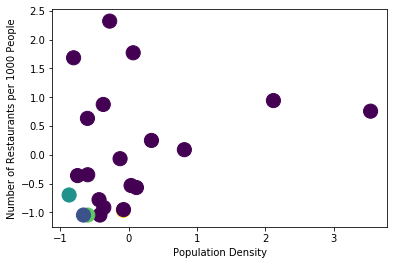

In [272]:
from sklearn.preprocessing import StandardScaler
df_clusters = StandardScaler().fit_transform(Vancouver_merged[['Population Density','Number of restaurants per 1000 people']])

import matplotlib.pyplot as plt
y_kmeans = Vancouver_merged['Cluster Labels']
plt.scatter(df_clusters[:, 0], df_clusters[:, 1], c = y_kmeans, s=200, cmap='viridis')

plt.xlabel('Population Density')
plt.ylabel('Number of Restaurants per 1000 People')
plt.show()

### Examining each cluster od data seperately

In [273]:
# Examine Clusters
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 0, Vancouver_merged.columns[[1] + list(range(5, Vancouver_merged.shape[1]))]]

,Population,Number of restaurants,Number of restaurants per 1000 people,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,15295,0,0.000000,0,Pet Store,Grocery Store,Bakery,Spa,Nightlife Spot,Yoga Studio,Ethiopian Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market
1,62030,42,0.677092,0,Italian Restaurant,Hotel,Sushi Restaurant,Restaurant,Café,Mexican Restaurant,Spa,Pizza Place,Park,Bakery
2,21425,5,0.233372,0,Sushi Restaurant,Ice Cream Shop,Sporting Goods Shop,Indian Restaurant,Coffee Shop,Italian Restaurant,Liquor Store,Salon / Barbershop,Event Space,Fast Food Restaurant
3,33620,13,0.386675,0,Coffee Shop,Park,Asian Restaurant,Pharmacy,Salon / Barbershop,Falafel Restaurant,Malay Restaurant,Restaurant,Camera Store,Korean Restaurant
4,29175,28,0.959726,0,Coffee Shop,Italian Restaurant,Café,Indian Restaurant,Park,Deli / Bodega,Japanese Restaurant,Pizza Place,Sushi Restaurant,French Restaurant
5,33045,3,0.090785,0,Vietnamese Restaurant,Pharmacy,Bakery,Sandwich Place,Liquor Store,Food Truck,Sushi Restaurant,Event Space,Bus Line,Coffee Shop
6,49165,8,0.162717,0,Bus Stop,Coffee Shop,Vietnamese Restaurant,Ice Cream Shop,Sandwich Place,Café,Chinese Restaurant,Convenience Store,Electronics Store,Filipino Restaurant
7,13975,13,0.930233,0,Coffee Shop,Chinese Restaurant,Pharmacy,Sandwich Place,Sushi Restaurant,Tea Room,Soccer Field,Burger Joint,Café,Portuguese Restaurant
8,22325,1,0.044793,0,Pool,Italian Restaurant,Track,Gym,Donut Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
9,43045,19,0.441399,0,Bakery,Ice Cream Shop,Thai Restaurant,Coffee Shop,Food Truck,French Restaurant,Japanese Restaurant,Sushi Restaurant,American Restaurant,Yoga Studio


In [274]:
# Cluster 2
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 1, Vancouver_merged.columns[[1] + list(range(5, Vancouver_merged.shape[1]))]]

,Population,Number of restaurants,Number of restaurants per 1000 people,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,13065,0,0.0,1,Pool,Food,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Donut Shop


In [275]:
# Cluster 3
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 2, Vancouver_merged.columns[[1] + list(range(5, Vancouver_merged.shape[1]))]]

,Population,Number of restaurants,Number of restaurants per 1000 people,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,8430,1,0.118624,2,French Restaurant,Park,Yoga Studio,Electronics Store,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant


In [276]:
# Cluster 4
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 3, Vancouver_merged.columns[[1] + list(range(5, Vancouver_merged.shape[1]))]]

,Population,Number of restaurants,Number of restaurants per 1000 people,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,13030,0,0.0,3,Playground,Park,Golf Course,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Deli / Bodega,Dog Run,Food


In [277]:
# Cluster 5
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 4, Vancouver_merged.columns[[1] + list(range(5, Vancouver_merged.shape[1]))]]

,Population,Number of restaurants,Number of restaurants per 1000 people,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,36500,1,0.027397,4,Indian Restaurant,Dessert Shop,Ethiopian Restaurant,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store


## 4. Results and Discussion <a id="results"></a>

The basic data analysis was performed to identify the most optimal neighborhood for the placement of the restaurant in the city of Vancouver. During the analysis, several important statistical features of the neighborhood were explored and visualized. Furthermore, clustering helped to highlight the group of optimal areas. Finally, Based on these results, one possibly good location for new restaurant would be on intersection of Knight Street and E 41st Avenue. This Location is on the boundary of three neighborhoods, namely, "Victoria-Fraserview", "Sunset" and "Kensington-Cedar Cottage". These three neighborhoods also don't have high rate of restaurant per each 1000 of people, respectively 0.03219, 0.02740, 0.16272. The total population of these three neighborhoods is about 116,000 people. This helps to attract more costumer mostly from these three neighborhoods; however, there is also "Memorial South Park" and "Kensigton Park" just a few blocks away from this location. This location is not also very close to downtown that could probably make the rent reasonable and not far from it to be out of access for employees who work in downtown during the days. Also, this place is close to the geographical center of the city which makes it to some extend accessible for everyone in the city. This location is the most attractive options for the further analysis. 

This analysis is done; however, one can perform further analysis of these particular clusters with additional features, such as distance to the center of city or to the center of cluster. After defining a neighborhood, one can perform deeper analysis to find the best exact location of the restaurant taking into account, factors such as number of parking places in the vicinity of the spot or distances to the main streets. Also type of new restaurant should be later analyzed and selected based on the ethnicity of the majority of people who live in the vicinity of this location. Another parameter that should be considered deeply is the net income per person between the residents of these three neighborhoods. This helps to define how fancy this restaurant should be.  

What could be the cause of error in our analysis?

Foursquare doesn't represent the full picture, since many venues are not on the list. Also, we limited the radius around the center and number of received venues form FourSquare. For that reason, another maps could be utilized such as Google map or Openstreet map for deeper analysis.
Neighborhoods have too complex geometry, thus defining the closest venues within the certain radius brings additional error to our analysis.

### Proposed location on the map based on the results

In [278]:
# create map
map_clusters = folium.Map(location=[Van_lat, Van_lng], zoom_start=11)
colours = ['red','black', 'blue','purple','green']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, pop in zip(Vancouver_merged['Latitude'], Vancouver_merged['Longitude'], Vancouver_merged['Neighborhood'], Vancouver_merged['Cluster Labels'], Vancouver_merged['Number of restaurants per 1000 people']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=pop*5+5,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
    hm_data = [[lat, lon]]
    
    map_clusters.add_child(plugins.HeatMap(hm_data,\
                                           radius=15*pop+15))

# ............
lat = (49.218416+ 49.247632)/2
lng = -123.0788
# map_to = folium.Map(location=[lat, lng], zoom_start = 17)
folium.CircleMarker(
    [lat, lng],
    radius=10,
    popup="Proposed Area for Our Restaurant!",
    color='orange',
    fill=False,
    fill_color='green',
    fill_opacity=0.7,
    parse_html=False).add_to(map_clusters)
# hm_data2 = [[lat,lng]]
# map_clusters.add_child(plugins.HeatMap(hm_data2))
folium.Marker([(49.218416+ 49.247632)/2, -123.0788], popup='Proposed Area for Our Restaurant!', icon=folium.Icon(color='green', icon ='coffee', prefix='fa')).add_to(map_clusters)
# map_clusters.add_child(folium.ClickForMarker(popup="Proposed Area for Our Restaurant!"))
map_clusters
# ...........    
    


## 5. Conclusion <a id="conclusions"></a>


To conclude, the basic data analysis was performed to identify the most optimal neighborhood for the placement of the restaurant in the city of Vancouver. During the analysis, several important statistical features of the neighborhood were explored and visualized. Furthermore, clustering helped to highlight the group of optimal areas. Finally, based on these results, one possibly good location for new restaurant would be on intersection of Knight Street and E 41st Avenue. This Location is on the boundary of three neighborhoods, namely, "Victoria-Fraserview", "Sunset" and "Kensington-Cedar Cottage". 

## End!

In [ ]:
# Support codes
# Customized icon with url

# import os
# import folium

# print(folium.__version__)

# from folium.features import CustomIcon

# m = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles='Stamen Terrain')

# url = 'http://leafletjs.com/examples/custom-icons/{}'.format
# icon_image = url('leaf-red.png')
# shadow_image = url('leaf-shadow.png')

# icon = CustomIcon(
#     icon_image,
#     icon_size=(38, 95),
#     icon_anchor=(22, 94),
#     shadow_image=shadow_image,
#     shadow_size=(50, 64),
#     shadow_anchor=(4, 62),
#     popup_anchor=(-3, -76)
# )

# marker = folium.Marker(
#     location=[45.3288, -121.6625],
#     icon=icon,
#     popup='Mt. Hood Meadows'
# )


# m.add_child(marker)

# m.save(os.path.join('results', 'CustomIcon.html'))

# m